In [1]:
# Dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as tkr


In [2]:
api_key = '3286c138a388ef8b9e598517a438a480860463e3'

In [3]:
# Vacant housing units = B25004_001E, 
# median home value = B25077_001E
# median year structures built = B25035_001E
url = 'https://api.census.gov/data/2013/acs1?get=NAME,B01003_001E,B25004_001E,B25077_001E,B25035_001E,B10010_001E,B15003_017E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B21001_002E,B21001_003E,B02008_001E,B02009_001E,B02010_001E,B02011_001E,B02012_001E,B02013_001E,B05001_002E,B05001_006E,B17001_002E,B24050_002E,B24050_005E,B24050_006E,B24050_007E,B24050_008E,B24050_009E,B24050_012E,B24050_013E,B24050_016E,B24050_020E,B24050_023E,B24050_027E,C23022_001E,B05002_013E&for=congressional%20district:*&key='
#url = 'https://api.census.gov/data/2016/acs1?get=*&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*&key='

#FORS
#metropolitan%20statistical%20area/micropolitan%20statistical%20area
#state
#congressional%20district

key_url = url + api_key

In [4]:
#base_url = 'https://api.census.gov/data/'
#year = '2016/'
#datasetAcronym = 'acs1/'
#query = '?get='

#full_url = base_url + year + datasetAcronym

#https://api.census.gov/data/2013/acs1?get=NAME,B02015_009E,B02015_009M&for=state:*&key=your key here

columns = {'NAME': 'Name of District',
            'B01003_001E' : 'Total Population',
            'B25004_001E' : 'Vacant Housing Units',
            'B25077_001E' : 'Median Home Value',
            'B25035_001E' : 'Median Year Sructures Built',
            'B10010_001E' : 'Median Income',
            'B15003_022E' : 'XXXXXXXXXXXXXXXX',
            'B08013_001E' : 'Movers to different state',
            'B08131_001E' : 'Aggregrate Travel Time to Work',
            "B15003_021E":"Associates Degree", 
            "B15003_017E":"High School Diploma", 
            "B15003_022E":"Bachelor's", 
            "B15003_023E":"Masters" , 
            "B15003_024E":"Professional" , 
            "B15003_025E":"Doctorate",
            "B21001_002E": "Veteran",
            "B21001_003E": "Non-Veteran",
            "B02008_001E":"White", 
            "B02009_001E":"African American",
            "B02010_001E":"Native American/Alaskan",
            "B02011_001E":"Asian",
            "B02012_001E": "Native Hawaiian/Pacific Islander",
            "B02013_001E":"OtherRace",
            'B05001_002E' : 'U.S. citizen',
            'B05001_006E' : 'Non U.S. citizen',
            "B17001_002E" : "Income in the past 12 months below poverty level",
            "B24050_002E" : "Agriculture, forestry, fishing and hunting, and mining",
            "B24050_005E" : "Construction",
            "B24050_006E" : "Manufacturing",
            "B24050_007E" : "Wholesale Trade",
            "B24050_008E" : "Retail Trade",
            "B24050_009E" : "Transportation and warehousing, and utilities",
            "B24050_012E" : "INFORMATION",
            "B24050_013E" : "Finance and insurance, and real estate and rental and leasing",
            "B24050_016E" : "Professional, scientific, and management, and administrative and waste management services",  
            "B24050_020E" : "Educational services, and health care and social assistance",
            "B24050_023E" : "Arts, entertainment, and recreation, and accommodation and food services",
            "B24050_027E" : "Public Administration",
           "C23022_001E" : "Total Unemployed",
           "B05002_013E" : "Foreign Born",
           "B05001_002E" : "U.S. citizen, born in the United States"
           
           
          }


In [5]:
census_response = requests.get(key_url)
census_json = census_response.json()

dataFrame =pd.DataFrame(census_json)
dataFrame.columns = dataFrame.iloc[0]
dataFrame = dataFrame.drop([0])
dataFrame = dataFrame.rename(columns=columns)

In [6]:
dataFrame.columns

Index(['Name of District', 'Total Population', 'Vacant Housing Units',
       'Median Home Value', 'Median Year Sructures Built', 'Median Income',
       'High School Diploma', 'Associates Degree', 'Bachelor's', 'Masters',
       'Professional', 'Doctorate', 'Veteran', 'Non-Veteran', 'White',
       'African American', 'Native American/Alaskan', 'Asian',
       'Native Hawaiian/Pacific Islander', 'OtherRace',
       'U.S. citizen, born in the United States', 'Non U.S. citizen',
       'Income in the past 12 months below poverty level',
       'Agriculture, forestry, fishing and hunting, and mining',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transportation and warehousing, and utilities', 'INFORMATION',
       'Finance and insurance, and real estate and rental and leasing',
       'Professional, scientific, and management, and administrative and waste management services',
       'Educational services, and health care and social assistance',
    

In [7]:
#covert isolated dataframe to numeric
isolated = dataFrame[(dataFrame['Name of District'] == "Congressional District 45 (113th Congress), California")]
isoNumeric = isolated['Total Population']   
isoNumeric = pd.to_numeric(isoNumeric)

In [8]:
#find average population of congressional district
s = dataFrame['Total Population']
s = pd.to_numeric(s)
avg_pop = s.mean()
avg_pop

731679.4622425629

In [9]:
#find population of irvine congress district
isolated_pop = isolated['Total Population'].mean()
isolated_pop

733706.0

In [10]:
popNames = ['Congressional District 45', 'Average']
popNums = [isolated_pop, avg_pop]

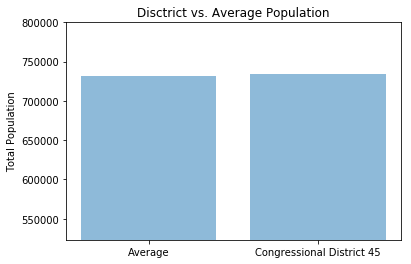

In [11]:
plt.bar(popNames, popNums, align='center', alpha=0.5)
plt.ylabel('Total Population')
plt.title('Disctrict vs. Average Population')
axes = plt.gca()
min_pop = s.min()
max_pop = s.max()
axes.set_ylim([min_pop,800000])
plt.show()

## Carre's Graphs - Start HERE

## Remember to fix Bachelor's above - It's in the URL twice.  Also US Citizen is in the url twice

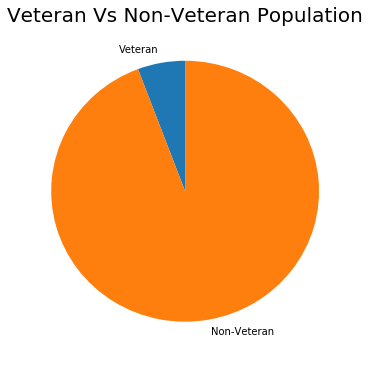

In [16]:
VeteranGraph = dataFrame[["Name of District","Veteran","Non-Veteran"]]
VeteranGraph= pd.DataFrame(VeteranGraph)

IrvineVet = VeteranGraph[(VeteranGraph['Name of District'] == "Congressional District 45 (113th Congress), California")]
VetTranspose = IrvineVet.T
VetData = VetTranspose.drop(["Name of District"])
VetData[66] = VetData[66].astype(str).astype(int)
data2 = VetData[66]
labels = "Veteran","Non-Veteran"
figure(1, figsize=(6,6))

fracs = data2
pie(fracs, labels=labels,
                startangle=90)
title("Veteran Vs Non-Veteran Population", fontsize = 20)

show()


